# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
%matplotlib inline
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
#
import seaborn as sns


# Extract ZIP File

In [ ]:
import zipfile
import os
zip_file_path = '/content/drive/MyDrive/RAJA/recp/archive (9).zip'
extract_dir = '/content/drive/MyDrive/RAJA/recp'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to /content/drive/MyDrive/RAJA/recp


# Data

In [ ]:
# Directories for training and testing data
train_dir = '/content/drive/MyDrive/RAJA/recp/UrduDataset/x_train/x_train'
test_dir = '/content/drive/MyDrive/RAJA/recp/UrduDataset/x_test/x_test'

x_train = []
y_train = []
x_test = []
y_test = []

print("Loading train data....")
for dirs in os.listdir(train_dir):
    dir_path = os.path.join(train_dir, dirs)
    for img_path in os.listdir(dir_path):
        img_full_path = os.path.join(dir_path, img_path)
        if img_path.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img = cv2.imread(img_full_path)
            if img is not None:  # Check if the image was loaded successfully
                img = cv2.resize(img, (128, 128))
                x_train.append(img)
                y_train.append(int(dirs))
            else:
                print(f"Failed to load image: {img_full_path}")
        else:
            print(f"Skipping non-image file: {img_full_path}")

print("Loading test data....")
for dirs in os.listdir(test_dir):
    dir_path = os.path.join(test_dir, dirs)
    for img_path in os.listdir(dir_path):
        img_full_path = os.path.join(dir_path, img_path)
        if img_path.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Check for valid image formats
            img = cv2.imread(img_full_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                x_test.append(img)
                y_test.append(int(dirs))
            else:
                print(f"Failed to load image: {img_full_path}")
        else:
            print(f"Skipping non-image file: {img_full_path}")

print("DONE")


Loading train data....
Loading test data....
DONE


# Debugging: Print the Image Path and Load the Image


In [ ]:
print(img_full_path)
img = cv2.imread(img_full_path)


/content/drive/MyDrive/RAJA/recp/UrduDataset/x_test/x_test/9/99.jpg


# Visualization: Display Sample Training Images with Labels


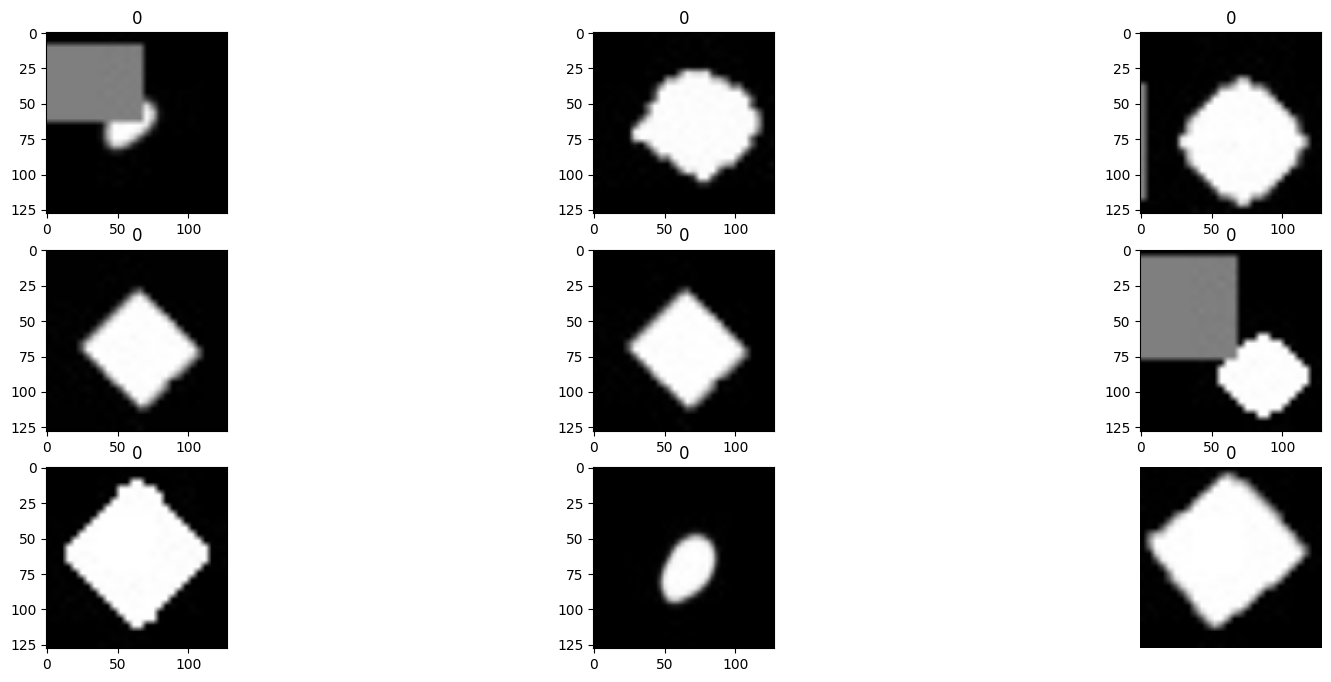

In [ ]:
fig = plt.figure(figsize=(20, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.title(int(y_train[i]))
    plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

40208
40208
10052
10052


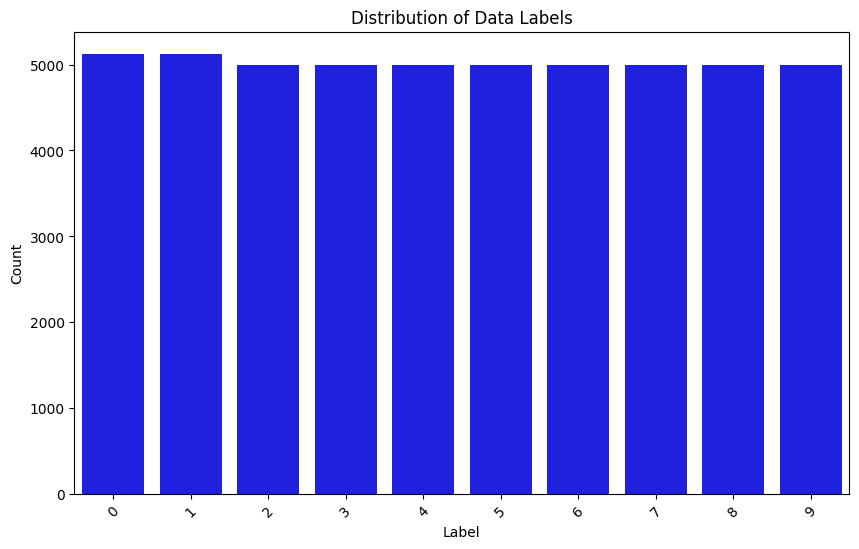

In [ ]:
import seaborn as sns


# Convert one-hot encoded labels to single integer labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
all_labels = np.concatenate([y_train_labels, y_test_labels])
unique_labels, counts = np.unique(all_labels, return_counts=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_labels, y=counts, color='blue')
plt.title('Distribution of Data Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split


x_train = np.array(x_train)
y_train = tf.keras.utils.to_categorical(np.array(y_train))
x_test = np.array(x_test)
y_test = tf.keras.utils.to_categorical(np.array(y_test))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(40208, 128, 128, 3)
(40208, 10)
(10052, 128, 128, 3)
(10052, 10)


# Model Definition: Build and Compile a Convolutional Neural Network


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.002),
                         input_shape=(128, 128, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (1,1), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.002)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.002)),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',metrics=['accuracy'])

# TRAIN


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler],
                    verbose=1)


Epoch 1/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9623 - loss: 0.3016 - val_accuracy: 0.9636 - val_loss: 0.2916 - learning_rate: 0.0010
Epoch 2/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9652 - loss: 0.2703 - val_accuracy: 0.9651 - val_loss: 0.2790 - learning_rate: 0.0010
Epoch 3/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9662 - loss: 0.2643 - val_accuracy: 0.9632 - val_loss: 0.2849 - learning_rate: 0.0010
Epoch 4/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9692 - loss: 0.2517 - val_accuracy: 0.9659 - val_loss: 0.2554 - learning_rate: 0.0010
Epoch 5/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9689 - loss: 0.2433 - val_accuracy: 0.9591 - val_loss: 0.2740 - learning_rate: 0.0010
Epoch 6/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9628 - loss: 0.2627 - val_accuracy: 0.9669 - val_loss: 0.2501 - learning_rate: 0.0010
Epoch 7/20
629/629 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9732 - l

In [ ]:
print("Test Accuracy is ", model.evaluate(x_test, y_test)[1])

315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9769 - loss: 0.1269
Test Accuracy is  0.9760246872901917


# Visualization of Model Training Performance


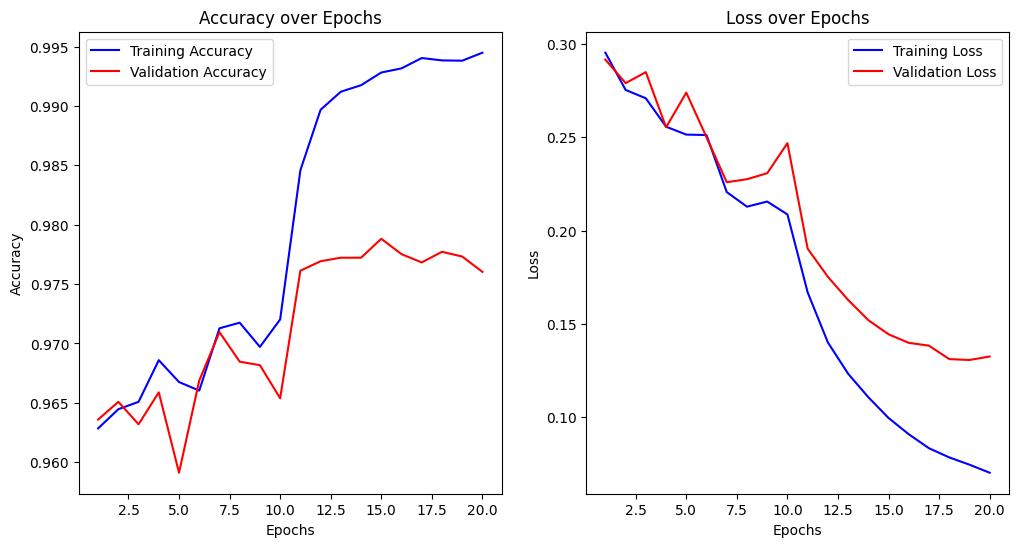

In [ ]:

x = range(1, len(history.history['accuracy']) + 1)
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training Accuracy')
plt.plot(x, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training Loss')
plt.plot(x, val_loss, 'r', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#  classification report and confusion matrix


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


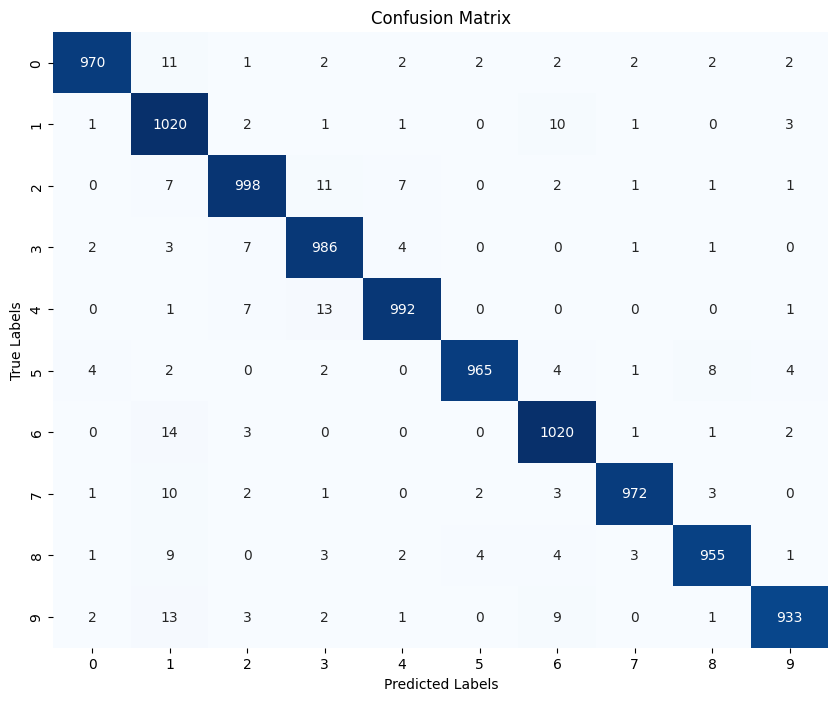

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       996
           1       0.94      0.98      0.96      1039
           2       0.98      0.97      0.97      1028
           3       0.97      0.98      0.97      1004
           4       0.98      0.98      0.98      1014
           5       0.99      0.97      0.98       990
           6       0.97      0.98      0.97      1041
           7       0.99      0.98      0.98       994
           8       0.98      0.97      0.98       982
           9       0.99      0.97      0.98       964

    accuracy                           0.98     10052
   macro avg       0.98      0.98      0.98     10052
weighted avg       0.98      0.98      0.98     10052



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
#  predictions for the test set
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using Seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Print the classification report for additional performance metrics
print("Classification Report:\n")
print(classification_report(y_true, y_pred))
